In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
x = df.drop('medv', axis=1)
y = df['medv']


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)#20 faiz test ucun ayiraq


In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=41) ##sinaq imtahni edirem ele bil x_testd ebirbasa etmemek ucun

In [49]:
lr = LinearRegression() ##birinc adi liaer reg tetebiq edek
lasso = Lasso()
ridge = Ridge()

In [58]:
lr.fit(x_train, y_train)
lr.score(x_test, y_test)  # r2 score verir
##adi liear ile edek birinci

0.6605257665777062

In [51]:
lr.coef_ ##knin qiymeti

array([-1.24539609e-01,  2.54989036e-02,  6.58243439e-02,  2.56383355e-02,
       -1.59506962e+01,  4.89388949e+00, -8.84837277e-03, -1.25682800e+00,
        2.23431734e-01, -9.97232738e-03, -1.13962850e+00,  1.19940172e-02,
       -4.12285159e-01])

In [48]:
lasso.fit(x_train, y_train)
lasso.score(x_test, y_test)

0.6704165126029873

In [47]:
lasso.coef_ ##lasso deyri ki  0 edir atdi bax kni  alphani azalanda az 0 edir deyirem ki cox analiz eleme

array([-0.07933914,  0.02557567, -0.        ,  0.        , -0.        ,
        2.27884305,  0.01175859, -0.49529172,  0.14127867, -0.00937551,
       -0.92187866,  0.01005033, -0.62674706])

In [31]:
alpha = [0.1, 0.2, 0.5, 1, 3, 5, 10] ##lasso ucun alpha nece versek ayxsidir yoxlaayaq

In [33]:
for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(x_train, y_train)
    print(f"Alpha: {i}, R2 Score: {lasso.score(x_val, y_val)}")  ###3 den sonra underfitting baslayir elebil  
#valiadation set  sinsaq imtahaninda yoxalyiriq ele bil 0.2 yaxsdir en yuksek r2 score ordairr

Alpha: 0.1, R2 Score: 0.6482196875933864
Alpha: 0.2, R2 Score: 0.649161296129264
Alpha: 0.5, R2 Score: 0.6488057676477611
Alpha: 1, R2 Score: 0.6387103727468859
Alpha: 3, R2 Score: 0.581961641979531
Alpha: 5, R2 Score: 0.5727673578840368
Alpha: 10, R2 Score: 0.519038680964022


In [52]:
lasso = Lasso(alpha=0.2)
lasso.fit(x_train, y_train)
lasso.score(x_test, y_test)

0.6569000533963801

In [53]:
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.6560317091288497

In [56]:
ridge.coef_ ## 0 ertmir 0-a yaxin edir

array([-0.11873603,  0.04062275, -0.03246883,  0.03618028, -0.1485241 ,
        2.40256388,  0.00320384, -0.95168941,  0.24889296, -0.01298739,
       -1.03048959,  0.01096157, -0.62467399])

In [54]:
alpha_list = [0.01, 0.1, 1, 3, 5, 10, 20, 100]

for i in alpha_list:
    ridge = Ridge(alpha=i)
    ridge.fit(x_train, y_train)
    score = ridge.score(x_val, y_val)
    print(f"Ridge Alpha: {i}, R2 Score: {score}") ##100 yaxisdir goruruk ki

Ridge Alpha: 0.01, R2 Score: 0.6568052867456574
Ridge Alpha: 0.1, R2 Score: 0.6559748624813572
Ridge Alpha: 1, R2 Score: 0.6506299446846999
Ridge Alpha: 3, R2 Score: 0.6477045863872701
Ridge Alpha: 5, R2 Score: 0.6477347924965833
Ridge Alpha: 10, R2 Score: 0.6496559262624609
Ridge Alpha: 20, R2 Score: 0.6531544263992537
Ridge Alpha: 100, R2 Score: 0.6568467150268118


In [55]:
ridge = Ridge(alpha=100)
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)
##ridge en yaxsidir deye bilerkmi yaxsi tapib yeni r2 coxdur

0.6859900039272786

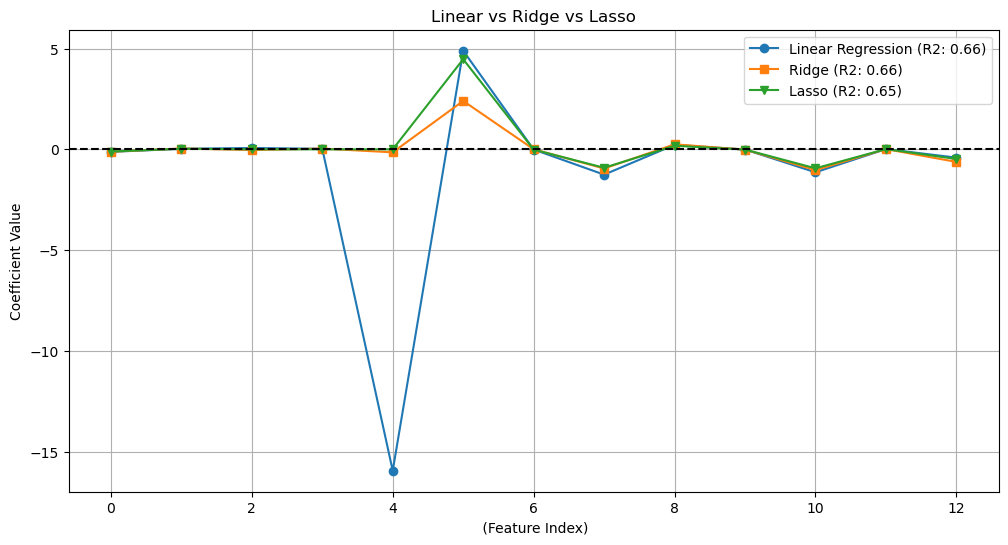

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(lr.coef_, 'o-', label=f'Linear Regression (R2: {lr.score(x_val, y_val):.2f})')
plt.plot(ridge.coef_, 's-', label=f'Ridge (R2: {ridge.score(x_val, y_val):.2f})')
plt.plot(lasso.coef_, 'v-', label=f'Lasso (R2: {lasso.score(x_val, y_val):.2f})')


plt.axhline(y=0, color='black', linestyle='--') # Sıfır çizgisi
plt.xlabel(' (Feature Index)')
plt.ylabel('Coefficient Value')
plt.title('Linear vs Ridge vs Lasso')
plt.legend()
plt.grid(True)
plt.show()

##ridge lasso overfitingin qarisni alib linear ele bil ezberleyib edir ele 